In [1]:
# Importing needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from category_encoders import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("dataset/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [40]:
df_test = pd.read_csv("dataset/test.csv")
df_test.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# print(df.columns)
df.drop(columns ="Ticket", inplace=True)

In [6]:
df_test.drop(columns ="Ticket", inplace=True)


In [7]:
df["Cabin"] = df["Cabin"].fillna(df["Cabin"].mode()[0])
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0]) 


In [8]:
df_test["Cabin"] = df_test["Cabin"].fillna(df_test["Cabin"].mode()[0])
df_test["Embarked"] = df_test["Embarked"].fillna(df_test["Embarked"].mode()[0]) 

In [9]:
df["Age"] = df["Age"].groupby([df["Pclass"], df["Sex"]]).apply(lambda x: x.fillna(x.mean()))


In [10]:
df_test["Age"] = df_test["Age"].groupby([df_test["Pclass"], df_test["Sex"]]).apply(lambda x: x.fillna(x.mean()))

In [11]:
df.drop(columns = "Fare", inplace = True)

In [12]:
df_test.drop(columns = "Fare", inplace = True)


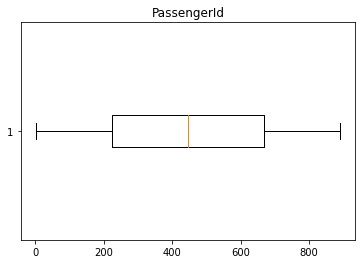

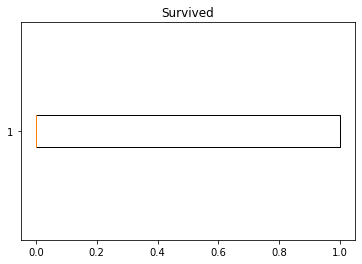

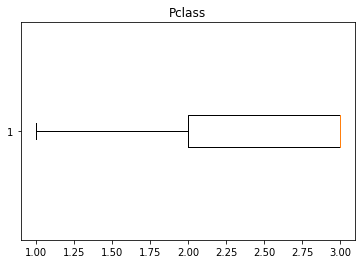

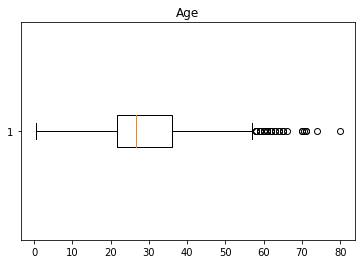

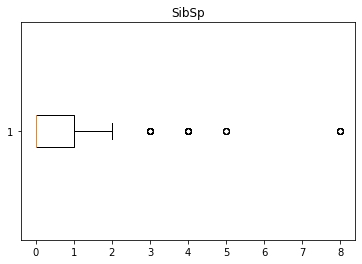

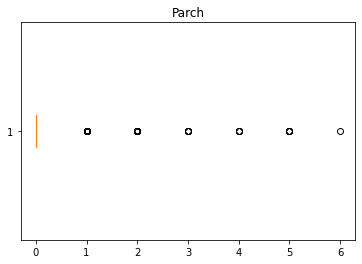

In [13]:
for i in df.select_dtypes("number").columns:
    
    plt.figure()
    plt.title(f'{i}')
    plt.boxplot(df[i], vert=False);

In [14]:
df.drop(columns = "PassengerId", inplace = True)
df.shape

(891, 9)

In [15]:
df_test.drop(columns = "PassengerId", inplace = True)
df_test.shape

(418, 8)

In [16]:
def outliers(df, ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3-Q1
    
    low = Q1 - 1.5 * IQR
    top = Q3 + 1.5 * IQR
    
    ls = df.index[ (df[ft] < low ) |  (df[ft]  > top) ]
    return ls

In [17]:
index_list = []
for i in ["Pclass", "Age","SibSp", "Parch"]:
    index_list.extend(outliers(df, i))


In [18]:
def remove (df, ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df


In [19]:
df_new = remove(df, index_list)


In [20]:
df_new.shape


(650, 9)

In [21]:
majority_class, minority_class = round(df["Survived"].value_counts(normalize = True),2)
print(majority_class, minority_class)

0.62 0.38


In [22]:
target = "Survived"
X= df_new.drop(columns = target)
y = df_new[target]

In [23]:
X_train, x_test, y_train, y_test = train_test_split( X,y, test_size = 0.2, random_state = 42)


In [24]:
#logistic regression

In [25]:
from sklearn.pipeline import Pipeline, make_pipeline

In [26]:
class1 = make_pipeline(OneHotEncoder(use_cat_names = True),LogisticRegression())
class1.fit(X_train, y_train)
y_pred1 = class1.predict(x_test)
print(classification_report(y_test, y_pred1))
accuracy_score(y_pred1, y_test)

              precision    recall  f1-score   support

           0       0.81      0.86      0.84        81
           1       0.75      0.67      0.71        49

    accuracy                           0.79       130
   macro avg       0.78      0.77      0.77       130
weighted avg       0.79      0.79      0.79       130



0.7923076923076923

In [34]:
model = class1.predict(df_test)

In [44]:
pred = pd.DataFrame(model)
sub_df = pd.read_csv("Predicted/Prediction.csv")
datasets = pd.concat([sub_df["PassengerId"], pred], axis = 1)
datasets.columns = ["PassengerId", "Survived"]
datasets.to_csv('Predicted/Prediction.csv', index=False)
